## Build Baseline Model
## Train a Logistic Regression model as an interpretable baseline
## Evaluate using AUC-PR, F1-Score, and Confusion Matrix

In [1]:
import sys
import os
import pandas as pd

# Add the src directory to the path to import modules
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from modelling import FraudModel

# Initialize the model class
fraud_model = FraudModel()

# Load the processed data
# Note: Ensure these files exist from the previous feature engineering step
X_train_path = '../data/processed/Fraud_Data_X_train_resampled.csv'
y_train_path = '../data/processed/Fraud_Data_y_train_resampled.csv'
X_test_path = '../data/processed/Fraud_Data_X_test.csv'
y_test_path = '../data/processed/Fraud_Data_y_test.csv'

X_train, y_train = fraud_model.load_data(X_train_path, y_train_path)
X_test, y_test = fraud_model.load_data(X_test_path, y_test_path)

# Check if data loaded correctly
if X_train is not None:
    print("Ready for training.")
else:
    print("Please run the feature engineering notebook first to generate the data.")

Data loaded successfully. X shape: (219136, 15), y shape: (219136,)
Data loaded successfully. X shape: (30223, 15), y shape: (30223,)
Ready for training.


In [2]:
# Train Logistic Regression
# We use max_iter=1000 to ensure convergence
model = fraud_model.train_logistic_regression(X_train, y_train, max_iter=1000, random_state=42)


--- Training Logistic Regression ---
Model training completed.
Model training completed.



--- Model Evaluation ---


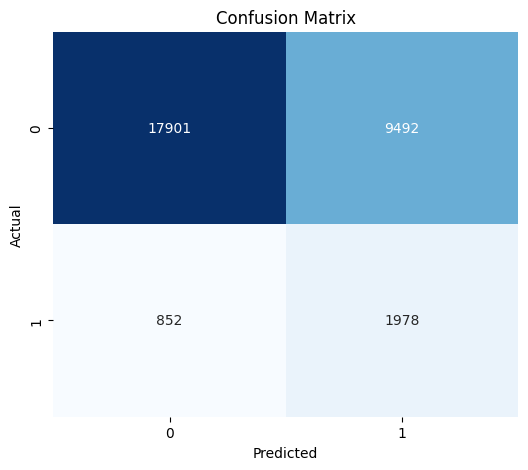


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.65      0.78     27393
           1       0.17      0.70      0.28      2830

    accuracy                           0.66     30223
   macro avg       0.56      0.68      0.53     30223
weighted avg       0.88      0.66      0.73     30223

ROC-AUC Score: 0.7375
AUC-PR Score: 0.3643


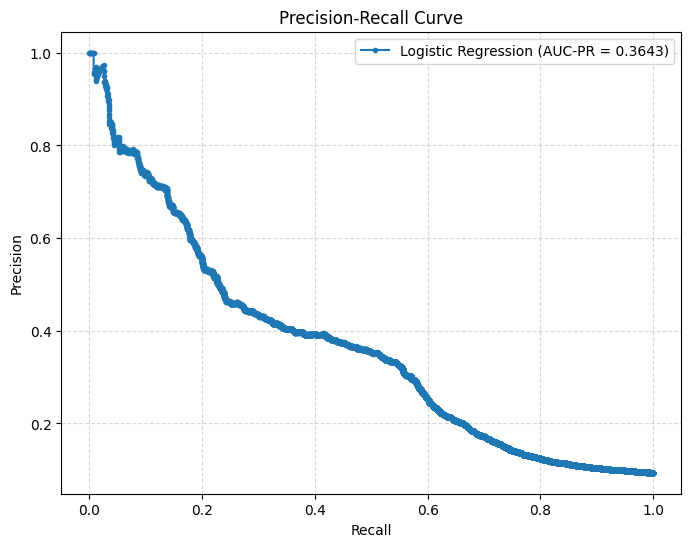

In [3]:
# Evaluate the model
metrics = fraud_model.evaluate_model(X_test, y_test)